<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pathlib

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ALLCools.mcds.MCDS import MCDS
from cemba_data.plot import *

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


In [2]:
total_meta = pd.read_msgpack('./ALL/cell_tidy_data.final_annotation.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sub_study_paths = list(
    pathlib.Path('./').glob('*/cell_tidy_data.final_annotation.msg'))

In [4]:
cluster_annos = []
for path in sub_study_paths:
    if 'ALL' in str(path):
        continue
    sub_meta = pd.read_msgpack(path)
    cluster_annos.append(sub_meta['consensus_cluster_rescued_anno'])
cluster_annos = pd.concat(cluster_annos)

In [5]:
total_meta['MajorCluster'] = total_meta['consensus_cluster_rescued_anno'].copy(
)
total_meta['SubCluster'] = total_meta['consensus_cluster_rescued_anno'].copy()
total_meta.loc[cluster_annos.index, 'SubCluster'] = cluster_annos

In [6]:
final_sub_cluster_names = []
for _, (major_cluster,
        sub_cluster) in total_meta[['MajorCluster', 'SubCluster']].iterrows():
    if major_cluster == sub_cluster:
        final_sub_cluster_names.append(major_cluster)
    else:
        if sub_cluster == 'Outlier':
            final_sub_cluster_names.append(sub_cluster)
        else:
            final_sub_cluster_names.append(f'{major_cluster}_{sub_cluster}')

In [9]:
total_meta['SubCluster'] = final_sub_cluster_names
print(total_meta['SubCluster'].unique().size)
print(total_meta['MajorCluster'].unique().size)

total_meta['SubCluster'].value_counts()

43
13


L23-IT-Cux2                1965
L4-IT-Rorb_Rorb-Tenm2       998
L5-IT-Deptor                898
L6-CT-Foxp2_Foxp2-Kcnh5     484
L6-CT-Foxp2_Foxp2-Glra2     448
L4-IT-Rorb_Rorb-Cpne4       376
L6-IT-Sulf1_Cables1         358
L5-PT-Bcl6                  354
L6-CT-Foxp2_Foxp2-Wscd1     326
L6-NP-Tshz2                 275
L6-IT-Sulf1_Meis2           266
Outlier                     243
MGE-Pvalb_Chrna7            236
L6-IT-Sulf1_Sulf1           226
CGE-VipNdnf_Lamp5-Unc5d     196
L4-IT-Rorb_Rorb-Ryr3        192
L6-CT-Foxp2_Spon1           183
MGE-Sst_Gfra2               176
NonN_ODC-Mog                144
L6b-Galnt10                 141
L6-CT-Foxp2_Hcrtr2          139
MGE-Pvalb_Cnih3             124
CGE-VipNdnf_Vip-Ano4        111
NonN_Astro-Slc1a2           109
CGE-VipNdnf_Lamp5-Ndnf       96
MGE-Pvalb_Man2a1             92
MGE-Sst_Daam2                78
CGE-VipNdnf_Vip-Prr16        71
MGE-Sst_Srrm4                68
NonN_Micro-Csf1r             68
MGE-Sst_Prep                 66
CGE-VipN

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


[Text(0.5, 1, 'SubClusters')]

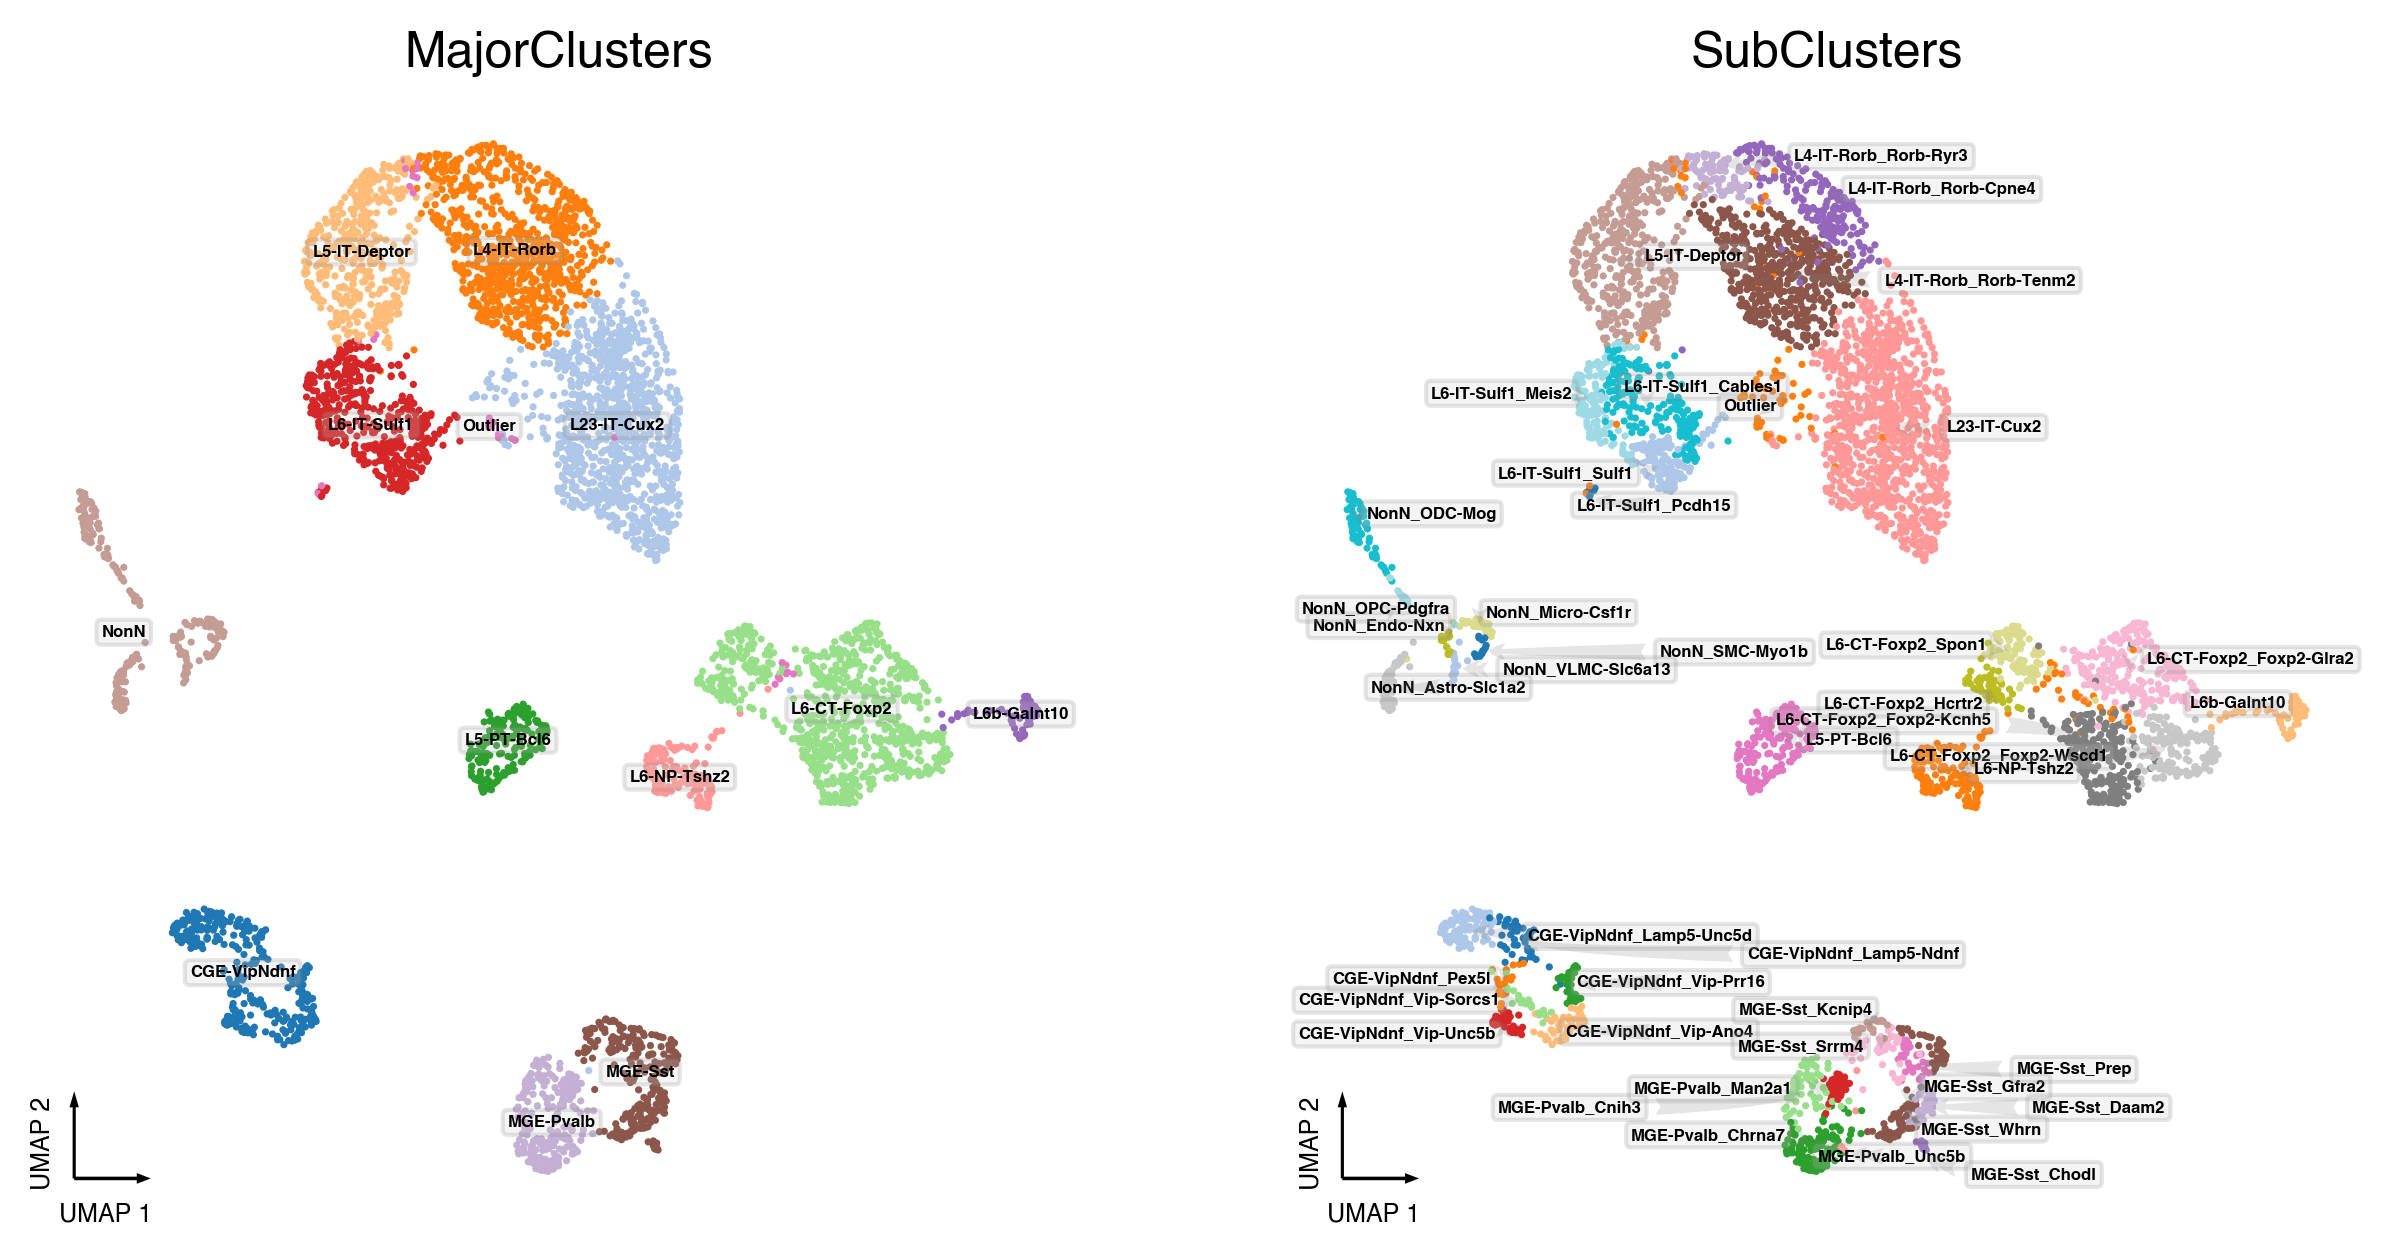

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), dpi=300, ncols=2)
categorical_scatter(data=total_meta,
                    coord_base='umap',
                    ax=ax1,
                    hue="MajorCluster",
                    palette='tab20',
                    text_anno="MajorCluster",
                    scatter_kws=dict(s=3),
                    text_anno_kws=dict(fontsize=4),
                    dodge_text=False)
categorical_scatter(data=total_meta,
                    coord_base='umap',
                    ax=ax2,
                    hue="SubCluster",
                    palette='tab20',
                    text_anno="SubCluster",
                    scatter_kws=dict(s=3),
                    text_anno_kws=dict(fontsize=4),
                    dodge_text=True)
ax1.set(title='MajorClusters')
ax2.set(title='SubClusters')

In [9]:
total_meta['FullCellID'] = total_meta['AllcPath'].apply(lambda i: '_'.join(
    pathlib.Path(i).name.split('_')[1:-1]))

In [10]:
total_meta = total_meta[[
    'FullCellID', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate', 'CH_RateAdj',
    'FinalReads', 'InputReads', 'MappedReads', 'Region', 'index_name', 'uid',
    'BamFilteringRate', 'MappingRate', 'Pos96', 'Plate', 'Col96', 'Row96',
    'Col384', 'Row384', 'FACS_Date', 'Slice', 'PassFilter', 'pca_0', 'pca_1',
    'umap_0', 'umap_1', 'tsne_0', 'tsne_1', 'MajorCluster', 'SubCluster'
]]
total_meta.to_csv('MOp.snmC-seq.AnalysisResult.csv.gz')

In [10]:
with open('ChC_cell_list.txt', 'w') as f:
    f.write('\n'.join(total_meta[total_meta['SubCluster'] == 'MGE-Pvalb_Unc5b'].index))